In [1]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('COVID19.csv', encoding='cp949')
df

,구분별,상태별,시점,인원[명],Unnamed: 4
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN
...,...,...,...,...,...
9149,검역,신규,2021. 02. 05,7.0,NaN
9150,검역,신규,2021. 02. 06,11.0,NaN
9151,검역,신규,2021. 02. 07,27.0,NaN
9152,검역,신규,2021. 02. 08,9.0,NaN


In [15]:
df.rename(columns={'구분별':'Category', '상태별':'Type', '시점':'Date', '인원[명]':'Headcount', 'Unnamed: 4':'Unnamed'}, inplace=True)
df

,Category,Type,Date,Headcount,Unnamed
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN
...,...,...,...,...,...
9149,검역,신규,2021. 02. 05,7.0,NaN
9150,검역,신규,2021. 02. 06,11.0,NaN
9151,검역,신규,2021. 02. 07,27.0,NaN
9152,검역,신규,2021. 02. 08,9.0,NaN


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   9154 non-null   object        
 1   Type       9154 non-null   object        
 2   Date       9154 non-null   datetime64[ns]
 3   Headcount  9099 non-null   float64       
 4   Unnamed    0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 357.7+ KB


In [17]:
df.drop(['Unnamed'], axis=1, inplace=True)
df

,Category,Type,Date,Headcount
0,전체,신규,2020-04-09,39.0
1,전체,신규,2020-04-10,27.0
2,전체,신규,2020-04-11,30.0
3,전체,신규,2020-04-12,32.0
4,전체,신규,2020-04-13,25.0
...,...,...,...,...
9149,검역,신규,2021-02-05,7.0
9150,검역,신규,2021-02-06,11.0
9151,검역,신규,2021-02-07,27.0
9152,검역,신규,2021-02-08,9.0


In [19]:
df.isna().sum()

Category      0
Type          0
Date          0
Headcount    55
dtype: int64

# 결측치 보간

In [20]:
filled_df = df.fillna(method='ffill')
filled_df

,Category,Type,Date,Headcount
0,전체,신규,2020-04-09,39.0
1,전체,신규,2020-04-10,27.0
2,전체,신규,2020-04-11,30.0
3,전체,신규,2020-04-12,32.0
4,전체,신규,2020-04-13,25.0
...,...,...,...,...
9149,검역,신규,2021-02-05,7.0
9150,검역,신규,2021-02-06,11.0
9151,검역,신규,2021-02-07,27.0
9152,검역,신규,2021-02-08,9.0


In [22]:
filled_df.isna().sum()

Category     0
Type         0
Date         0
Headcount    0
dtype: int64

In [23]:
interpolated_df = df.interpolate(method='linear')
interpolated_df

,Category,Type,Date,Headcount
0,전체,신규,2020-04-09,39.0
1,전체,신규,2020-04-10,27.0
2,전체,신규,2020-04-11,30.0
3,전체,신규,2020-04-12,32.0
4,전체,신규,2020-04-13,25.0
...,...,...,...,...
9149,검역,신규,2021-02-05,7.0
9150,검역,신규,2021-02-06,11.0
9151,검역,신규,2021-02-07,27.0
9152,검역,신규,2021-02-08,9.0


In [24]:
interpolated_df.isna().sum()

Category     0
Type         0
Date         0
Headcount    0
dtype: int64

In [25]:
df = df.loc[df['Headcount'] >= 0]
df

,Category,Type,Date,Headcount
0,전체,신규,2020-04-09,39.0
1,전체,신규,2020-04-10,27.0
2,전체,신규,2020-04-11,30.0
3,전체,신규,2020-04-12,32.0
4,전체,신규,2020-04-13,25.0
...,...,...,...,...
9149,검역,신규,2021-02-05,7.0
9150,검역,신규,2021-02-06,11.0
9151,검역,신규,2021-02-07,27.0
9152,검역,신규,2021-02-08,9.0


In [26]:
df.set_index('Date', inplace=True)
df

,Category,Type,Headcount
Date,,,
2020-04-09,전체,신규,39.0
2020-04-10,전체,신규,27.0
2020-04-11,전체,신규,30.0
2020-04-12,전체,신규,32.0
2020-04-13,전체,신규,25.0
...,...,...,...
2021-02-05,검역,신규,7.0
2021-02-06,검역,신규,11.0
2021-02-07,검역,신규,27.0


<Axes: xlabel='Date'>

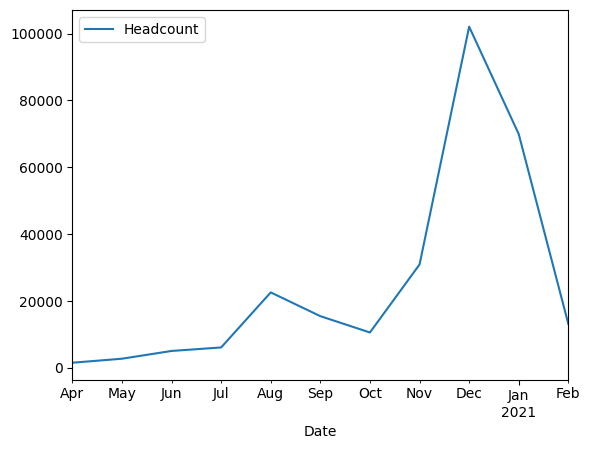

In [28]:
downsampled_df = df.resample('M').sum(numeric_only=True)
downsampled_df.plot()

In [41]:
upsampled_df = downsampled_df.resample('D').mean(numeric_only=True)
upsampled_df

,Headcount
Date,
2020-04-30,1526.0
2020-05-01,NaN
2020-05-02,NaN
2020-05-03,NaN
2020-05-04,NaN
...,...
2021-02-24,NaN
2021-02-25,NaN
2021-02-26,NaN


<Axes: xlabel='Date'>

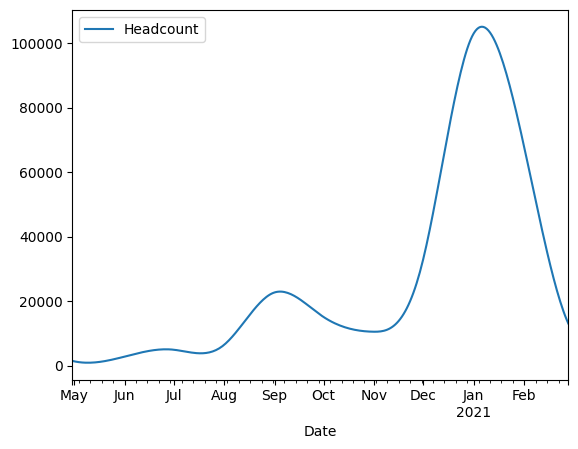

In [44]:
up_df = upsampled_df.interpolate(method='cubic') # time, linear
up_df.plot()

# expending

<Axes: xlabel='Date'>

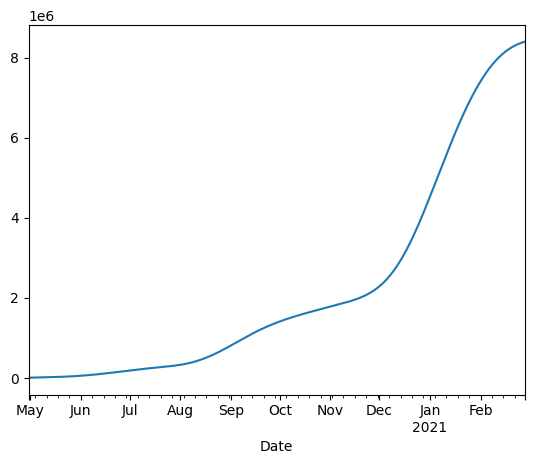

In [47]:
expanding_mean = up_df['Headcount'].expanding().sum()
expanding_mean.plot()

In [48]:
data = {'value':[1,2,3,4,5]}
df = pd.DataFrame(data)
df['expanding sum'] = df['value'].expanding().sum()
df

,value,expanding sum
0,1,1.0
1,2,3.0
2,3,6.0
3,4,10.0
4,5,15.0


# 범주형

In [51]:
sr_01 = pd.Series(['Red', 'Blue', 'Green', 'Red', 'Green'])
print(sr_01)
sr_01 = sr_01.astype('category')
print(sr_01)

0      Red
1     Blue
2    Green
3      Red
4    Green
dtype: object
0      Red
1     Blue
2    Green
3      Red
4    Green
dtype: category
Categories (3, object): ['Blue', 'Green', 'Red']


In [52]:
sr_2 = pd.Series(['Red', 'Blue', 'Green', 'Red', 'Green'],
                 dtype='category')
sr_2

0      Red
1     Blue
2    Green
3      Red
4    Green
dtype: category
Categories (3, object): ['Blue', 'Green', 'Red']

In [53]:
sr_2.cat.categories

Index(['Blue', 'Green', 'Red'], dtype='object')

In [54]:
sr_2.value_counts()

Green    2
Red      2
Blue     1
Name: count, dtype: int64